# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [8]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 620


In [9]:
print(cities)

['amderma', 'caravelas', 'sitka', 'lebu', 'ponta do sol', 'tete', 'manokwari', 'ribeira grande', 'kruisfontein', 'port alfred', 'faya', 'isiolo', 'monforte de lemos', 'taolanaro', 'tilichiki', 'ostrovnoy', 'rawannawi', 'kodiak', 'mogadishu', 'dhidhdhoo', 'namatanai', 'rikitea', 'arraial do cabo', 'atuona', 'hermanus', 'avarua', 'yeppoon', 'pacific grove', 'paragominas', 'cape town', 'chapais', 'chuy', 'kapaa', 'mar del plata', 'mahebourg', 'new norfolk', 'ulaangom', 'bere', 'punta arenas', 'bathsheba', 'hambantota', 'makat', 'nikolskoye', 'vaini', 'east london', 'la ronge', 'medeiros neto', 'cidreira', 'upernavik', 'iqaluit', 'noumea', 'bluff', 'yoichi', 'tsihombe', 'louisbourg', 'esperance', 'oussouye', 'faanui', 'baykit', 'puerto ayora', 'tabou', 'port-gentil', 'rundu', 'hithadhoo', 'serrana', 'nanortalik', 'chikoy', 'saskylakh', 'ushuaia', 'qaanaaq', 'batangafo', 'bredasdorp', 'roding', 'orange cove', 'constitucion', 'beroroha', 'parakou', 'albany', 'mercedes', 'cagayan de tawi-tawi

In [10]:
city_data = []
city='varhaug'
city_url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'
city_weather = requests.get(city_url).json()
print(json.dumps(city_weather,indent=4,sort_keys = True))


{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 58.6147,
        "lon": 5.6457
    },
    "dt": 1674961371,
    "id": 3132644,
    "main": {
        "feels_like": 273.23,
        "grnd_level": 1011,
        "humidity": 91,
        "pressure": 1016,
        "sea_level": 1016,
        "temp": 278.29,
        "temp_max": 279.2,
        "temp_min": 277.97
    },
    "name": "Varhaug",
    "sys": {
        "country": "NO",
        "id": 2004016,
        "sunrise": 1674978683,
        "sunset": 1675007361,
        "type": 2
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 280,
        "gust": 13.61,
        "speed": 8.89
    }
}


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [11]:
# Set the API base URL
#url = f'https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={weather_api_key}'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'



    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1


    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = ((city_weather['main']['temp_max'] - 273.15)*(9/5))+32
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except KeyError:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | amderma
City not found. Skipping...
Processing Record 2 of Set 1 | caravelas
Processing Record 3 of Set 1 | sitka
Processing Record 4 of Set 1 | lebu
Processing Record 5 of Set 1 | ponta do sol
Processing Record 6 of Set 1 | tete
Processing Record 7 of Set 1 | manokwari
Processing Record 8 of Set 1 | ribeira grande
Processing Record 9 of Set 1 | kruisfontein
Processing Record 10 of Set 1 | port alfred
Processing Record 11 of Set 1 | faya
Processing Record 12 of Set 1 | isiolo
Processing Record 13 of Set 1 | monforte de lemos
Processing Record 14 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 15 of Set 1 | tilichiki
Processing Record 16 of Set 1 | ostrovnoy
Processing Record 17 of Set 1 | rawannawi
City not found. Skipping...
Processing Record 18 of Set 1 | kodiak
Processing Record 19 of Set 1 | mogadishu
Processing Record 20 of Set 1 | dhidhdhoo
Processing Record 21 of Set 1 |

In [12]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [13]:
# Display sample data
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,caravelas,-17.7125,-39.2481,75.272,91,14,1.92,BR,1674961372
1,sitka,57.0531,-135.3300,35.492,64,20,2.06,US,1674961372
2,lebu,-37.6167,-73.6500,60.476,91,0,8.05,CL,1674961373
3,ponta do sol,32.6667,-17.1000,57.002,79,42,3.07,PT,1674961373
4,tete,-16.1564,33.5867,75.290,100,20,0.00,MZ,1674961374


In [14]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [15]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,caravelas,-17.7125,-39.2481,75.272,91,14,1.92,BR,1674961372
1,sitka,57.0531,-135.3300,35.492,64,20,2.06,US,1674961372
2,lebu,-37.6167,-73.6500,60.476,91,0,8.05,CL,1674961373
3,ponta do sol,32.6667,-17.1000,57.002,79,42,3.07,PT,1674961373
4,tete,-16.1564,33.5867,75.290,100,20,0.00,MZ,1674961374


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

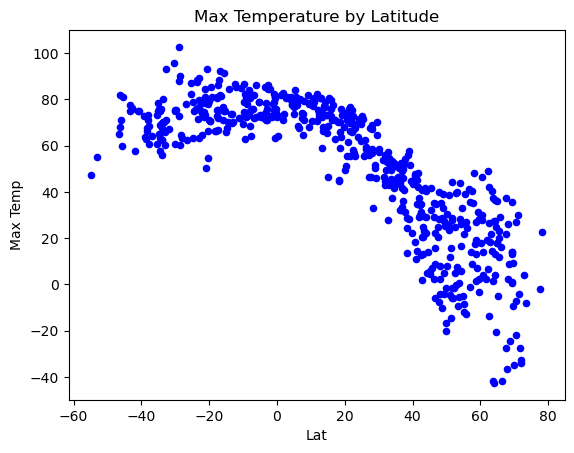

In [16]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(x='Lat',y='Max Temp', kind="scatter", color='blue')

# Incorporate the other graph properties
plt.title('Max Temperature by Latitude')

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

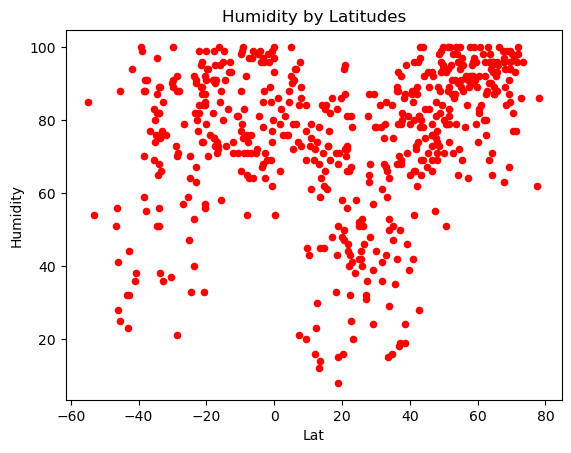

In [17]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(x='Lat',y='Humidity', kind="scatter", color='red')

# Incorporate the other graph properties
plt.title('Humidity by Latitudes')

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

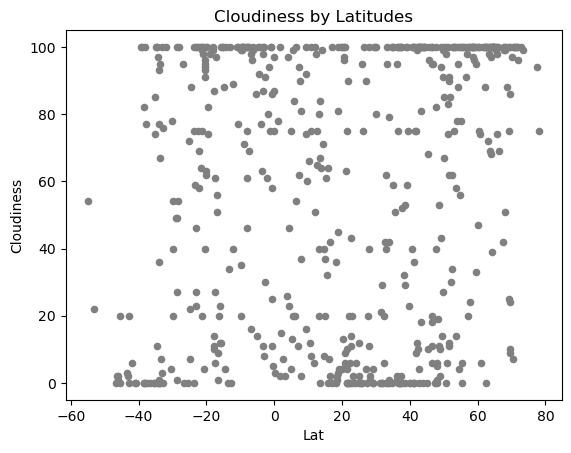

In [18]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(x='Lat',y='Cloudiness', kind="scatter", color='grey')

# Incorporate the other graph properties
plt.title('Cloudiness by Latitudes')

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

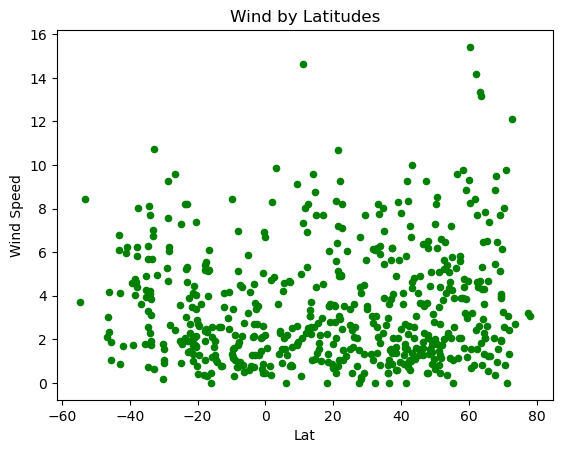

In [19]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(x='Lat',y='Wind Speed', kind="scatter", color='green')

# Incorporate the other graph properties
plt.title('Wind by Latitudes')

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [20]:
# Define a function to create Linear Regression plots
def linear_regression(latitudes,weather):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(latitudes, weather)
    regress_values = latitudes * slope + intercept
    regression_equation = f"y = {round(slope,2)}x + {round(intercept,2)}"
    pearson = st.pearsonr(latitudes,weather)
    return(regress_values, pearson)

In [21]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,sitka,57.0531,-135.3300,35.492,64,20,2.06,US,1674961372
3,ponta do sol,32.6667,-17.1000,57.002,79,42,3.07,PT,1674961373
6,ribeira grande,38.5167,-28.7000,55.778,87,53,4.92,PT,1674961375
9,faya,18.3851,42.4509,45.122,83,2,0.96,SA,1674961377
10,isiolo,0.3546,37.5822,64.094,54,3,1.58,KE,1674961377


In [22]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,caravelas,-17.7125,-39.2481,75.272,91,14,1.92,BR,1674961372
2,lebu,-37.6167,-73.6500,60.476,91,0,8.05,CL,1674961373
4,tete,-16.1564,33.5867,75.290,100,20,0.00,MZ,1674961374
5,manokwari,-0.8667,134.0833,78.728,85,100,0.62,ID,1674961374
7,kruisfontein,-34.0033,24.7314,56.012,82,36,2.31,ZA,1674961376


###  Temperature vs. Latitude Linear Regression Plot

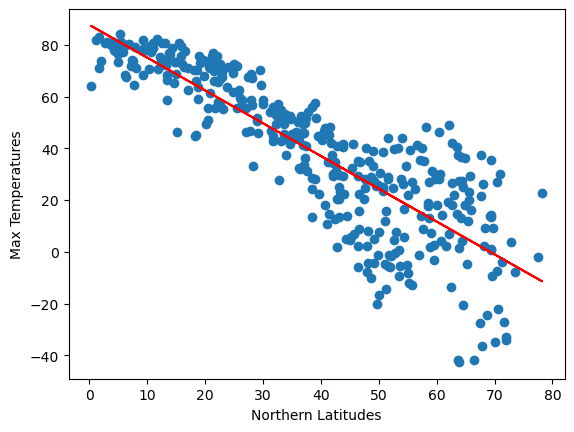

Correlation between factors is -0.85


In [23]:
# Linear regression on Northern Hemisphere
north_lats = northern_hemi_df['Lat']
north_temps = northern_hemi_df['Max Temp']
north_temp_corr = linear_regression(north_lats,north_temps)
plt.scatter(north_lats,north_temps)
plt.plot(north_lats,north_temp_corr[0], "r-")
plt.xlabel('Northern Latitudes')
plt.ylabel('Max Temperatures')
plt.show()
print(f'Correlation between factors is {round(north_temp_corr[1][0],2)}')


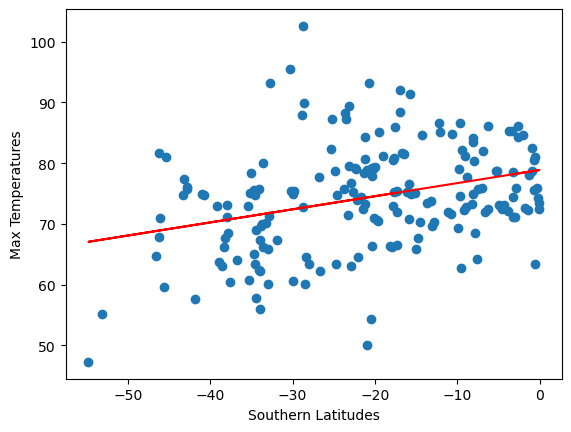

Correlation between factors is 0.32


In [24]:
# Linear regression on Southern Hemisphere
south_lats = southern_hemi_df['Lat']
south_temps = southern_hemi_df['Max Temp']
south_temp_corr = linear_regression(south_lats,south_temps)
plt.scatter(south_lats,south_temps)
plt.plot(south_lats,south_temp_corr[0], "r-")
# plt.xlim(south_temps.max()+3,south_temps.min()-3)
plt.xlabel('Southern Latitudes')
plt.ylabel('Max Temperatures')
plt.show()
print(f'Correlation between factors is {round(south_temp_corr[1][0],2)}')


**Discussion about the linear relationship:** 
In connecting max temperatures to latitudes, we see a high correlation between the two factors in the northern hemisphere, in fact having the highest correlation in this study, with a Pearson R statistic having an absolute value of 0.84. However, when examining the southern hemisphere, we do not see a corresponding correlation between latitudes and max temperatures, receiving a low Pearson stat at 0.31. If examining the northern hemisphere alone, one would be compelled to believe that the two are connected, but after taking the south into consideration, we are given pause and compelled to examine other factors affecting temperatures as well as other weather conditions which may be impacted by latitude.

### Humidity vs. Latitude Linear Regression Plot

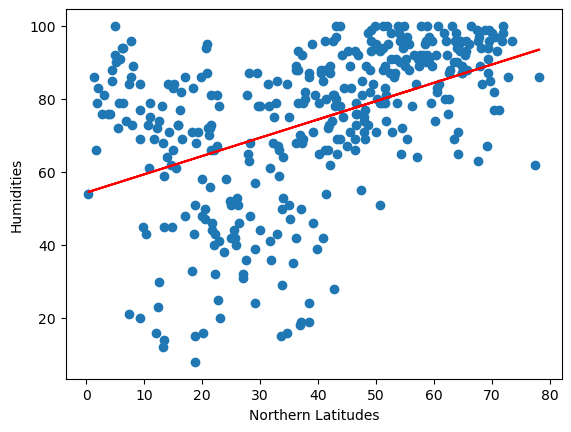

Correlation between factors is 0.46


In [25]:
# Northern Hemisphere
north_lats = northern_hemi_df['Lat']
north_humid = northern_hemi_df['Humidity']
north_humid_corr = linear_regression(north_lats,north_humid)
plt.scatter(north_lats,north_humid)
plt.plot(north_lats,north_humid_corr[0], "r-")
plt.xlabel('Northern Latitudes')
plt.ylabel('Humidities')
plt.show()
print(f'Correlation between factors is {round(north_humid_corr[1][0],2)}')

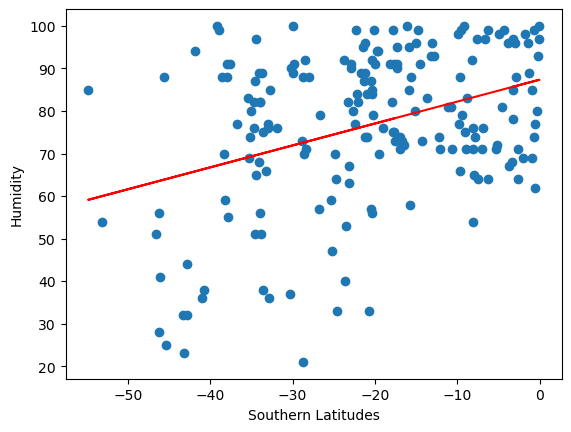

Correlation between factors is 0.37


In [29]:
# Southern Hemisphere
south_lats = southern_hemi_df['Lat']
south_humid = southern_hemi_df['Humidity']
sh_humid_corr = linear_regression(south_lats,south_humid)
plt.scatter(south_lats,south_humid)
plt.plot(south_lats,sh_humid_corr[0], "r-")
plt.xlabel('Southern Latitudes')
plt.ylabel('Humidity')
plt.show()
print(f'Correlation between factors is {round(sh_humid_corr[1][0],2)}')

**Discussion about the linear relationship:** 
When examining the possible correlation between latitudes and humidity, we do not find a strong connection, both the north and south receiving a low correlation and Pearson stat absolute value near 0.40. As humidity requires moisture, we need to examine the factors which would add moisture to the atmosphere, and keep it there.

### Cloudiness vs. Latitude Linear Regression Plot

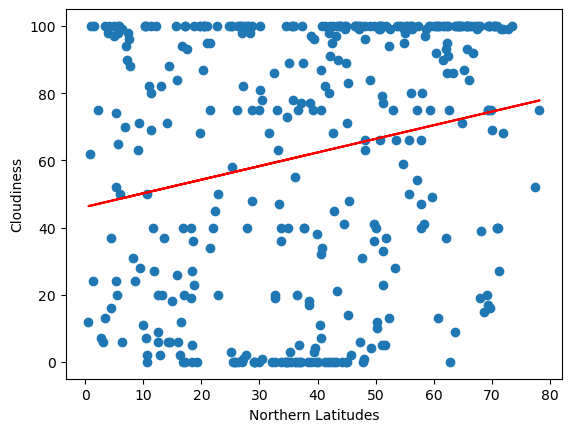

Correlation between factors is 0.21


In [ ]:
# Northern Hemisphere
north_lats = northern_hemi_df['Lat']
north_cloud = northern_hemi_df['Cloudiness']
north_cloud_corr = linear_regression(north_lats,north_cloud)
plt.scatter(north_lats,north_cloud)
plt.plot(north_lats,north_cloud_corr[0], "r-")
plt.xlabel('Northern Latitudes')
plt.ylabel('Cloudiness')
plt.show()
print(f'Correlation between factors is {round(north_cloud_corr[1][0],2)}')

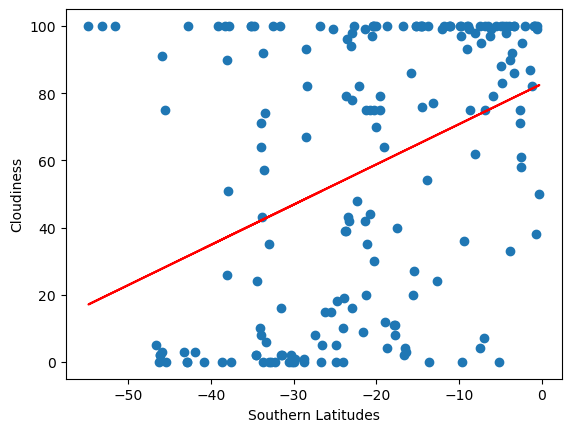

Correlation between factors is 0.39


In [ ]:
# Southern Hemisphere
south_lats = southern_hemi_df['Lat']
south_cloud = southern_hemi_df['Cloudiness']
sh_cloud_corr = linear_regression(south_lats,south_cloud)
plt.scatter(south_lats,south_cloud)
plt.plot(south_lats,sh_cloud_corr[0], "r-")
plt.xlabel('Southern Latitudes')
plt.ylabel('Cloudiness')
plt.show()
print(f'Correlation between factors is {round(sh_cloud_corr[1][0],2)}')

**Discussion about the linear relationship:** 
The connection between cloudiness and latitude is our weakest connection thus far, with the northern hemisphere only having a negligible correlation present and the southern a low correlation. In examining the scatterplot, we can in fact see that there is a large range across the latitudes with both extremely low and extremely high levels of cloudiness. 

### Wind Speed vs. Latitude Linear Regression Plot

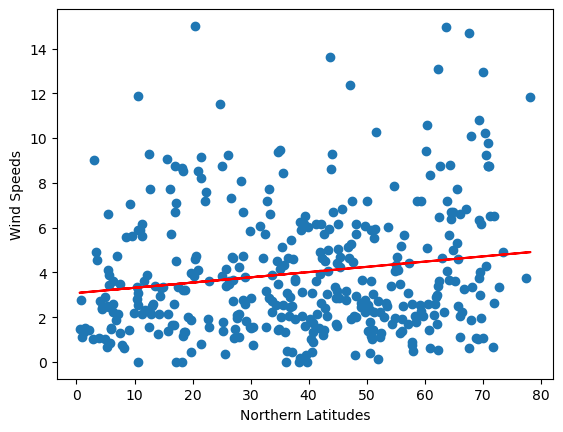

Correlation between factors is 0.16


In [ ]:
# Northern Hemisphere
north_lats = northern_hemi_df['Lat']
north_wind = northern_hemi_df['Wind Speed']
north_wind_corr = linear_regression(north_lats,north_wind)
plt.scatter(north_lats,north_wind)
plt.plot(north_lats,north_wind_corr[0], "r-")
plt.xlabel('Northern Latitudes')
plt.ylabel('Wind Speeds')
plt.show()
print(f'Correlation between factors is {round(north_wind_corr[1][0],2)}')

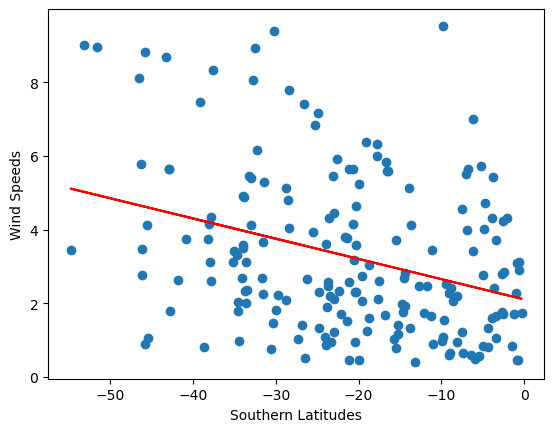

Correlation between factors is -0.33


In [ ]:
# Southern Hemisphere
south_lats = southern_hemi_df['Lat']
south_wind = southern_hemi_df['Wind Speed']
sh_wind_corr = linear_regression(south_lats,south_wind)
plt.scatter(south_lats,south_wind)
plt.plot(south_lats,sh_wind_corr[0], "r-")
plt.xlabel('Southern Latitudes')
plt.ylabel('Wind Speeds')
plt.show()
print(f'Correlation between factors is {round(sh_wind_corr[1][0],2)}')

**Discussion about the linear relationship:** 
Our final attempt at connecting latitudes to weather conditions is that of wind speed, with the lowest connection of all, the northern hemisphere reaching the lowest Pearson statistic of 0.16. Our initial assessment that latitude might have an impact on weather, particularly in the northern hemisphere appears to be false. 